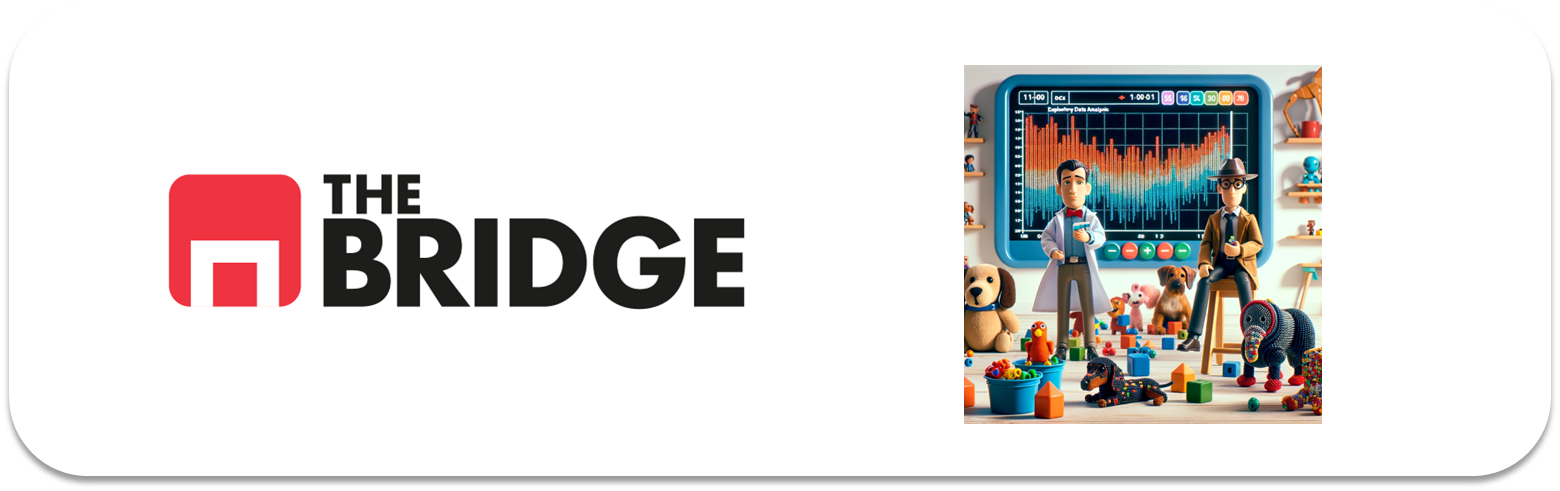

## PRACTICA OBLIGATORIA: ANÁLISIS MULTIVARIANTE

* La práctica obligatoria de esta unidad consiste en completar el análisis del dataset del Titanic, dirigido por una serie de preguntas, y de terminar de analizar algunos aspectos del dataset de viajes. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

In [4]:
!pip3 install --upgrade seaborn

### Ejercicio 0


Importa los paquetes y módulos que necesites a lo largo del notebook

In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from bootcampviztools import plot_combined_graphs, pinta_distribucion_categoricas, plot_categorical_relationship_fin,\
      plot_grouped_boxplots,plot_grouped_histograms, grafico_dispersion_con_correlacion, plot_categorical_numerical_relationship, bubble_plot
from scipy.stats import pearsonr, chi2_contingency, mannwhitneyu,f_oneway

In [6]:
sns.__version__

'0.13.0'

## #1 TITANIC

### #1.1

Carga en un dataframe el dataset del titanic, que está en la ruta "./data/titanic.csv".

In [7]:
df_titanic = pd.read_csv("./data/titanic.csv")
df_titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


### #1.2

Deshazte de las columnas "deck", "survived", "pclass" y "embarked" porque no las emplearemos, la primera por su cantidad de nulos y el resto porque son variantes de otras que ya existen y cuyos valores resultan más expresivos a la hora de hacer un análisis. 

In [8]:
eliminar = ["deck", "survived", "pclass", "embarked"]
df_titanic = df_titanic.drop(columns = eliminar)
df_titanic

,sex,age,sibsp,parch,fare,class,who,adult_male,embark_town,alive,alone
0,male,22.0,1,0,7.2500,Third,man,True,Southampton,no,False
1,female,38.0,1,0,71.2833,First,woman,False,Cherbourg,yes,False
2,female,26.0,0,0,7.9250,Third,woman,False,Southampton,yes,True
3,female,35.0,1,0,53.1000,First,woman,False,Southampton,yes,False
4,male,35.0,0,0,8.0500,Third,man,True,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...
886,male,27.0,0,0,13.0000,Second,man,True,Southampton,no,True
887,female,19.0,0,0,30.0000,First,woman,False,Southampton,yes,True
888,female,NaN,1,2,23.4500,Third,woman,False,Southampton,no,False
889,male,26.0,0,0,30.0000,First,man,True,Cherbourg,yes,True


### #1.3

Suma las columnas "parch" y "sibsp" para tener el número de parientes de cada pasajero, guarda el resultado en otra columna "family_members", luego deshazte de "parch" y "sibsp"

In [9]:
df_titanic["family_members"] = df_titanic["parch"] + df_titanic["sibsp"]

df_titanic = df_titanic.drop(columns=["parch", "sibsp"])

df_titanic



,sex,age,fare,class,who,adult_male,embark_town,alive,alone,family_members
0,male,22.0,7.2500,Third,man,True,Southampton,no,False,1
1,female,38.0,71.2833,First,woman,False,Cherbourg,yes,False,1
2,female,26.0,7.9250,Third,woman,False,Southampton,yes,True,0
3,female,35.0,53.1000,First,woman,False,Southampton,yes,False,1
4,male,35.0,8.0500,Third,man,True,Southampton,no,True,0
...,...,...,...,...,...,...,...,...,...,...
886,male,27.0,13.0000,Second,man,True,Southampton,no,True,0
887,female,19.0,30.0000,First,woman,False,Southampton,yes,True,0
888,female,NaN,23.4500,Third,woman,False,Southampton,no,False,3
889,male,26.0,30.0000,First,man,True,Cherbourg,yes,True,0


### #1.4

Imputa la moda a los valores nulos de "embark_town"

In [10]:
moda_embark_town = df_titanic["embark_town"].mode()[0]
df_titanic["embark_town"] = df_titanic["embark_town"].fillna(moda_embark_town)
df_titanic


,sex,age,fare,class,who,adult_male,embark_town,alive,alone,family_members
0,male,22.0,7.2500,Third,man,True,Southampton,no,False,1
1,female,38.0,71.2833,First,woman,False,Cherbourg,yes,False,1
2,female,26.0,7.9250,Third,woman,False,Southampton,yes,True,0
3,female,35.0,53.1000,First,woman,False,Southampton,yes,False,1
4,male,35.0,8.0500,Third,man,True,Southampton,no,True,0
...,...,...,...,...,...,...,...,...,...,...
886,male,27.0,13.0000,Second,man,True,Southampton,no,True,0
887,female,19.0,30.0000,First,woman,False,Southampton,yes,True,0
888,female,NaN,23.4500,Third,woman,False,Southampton,no,False,3
889,male,26.0,30.0000,First,man,True,Cherbourg,yes,True,0


### #1.5

Imputa la media a los valores faltantes de "age", si quieres puedes hacer algo más preciso (por ejemplo considerando además la columna "who")

In [11]:
media_por_grupo = df_titanic.groupby("who")["age"].transform("mean")
df_titanic["age"] = df_titanic["age"].fillna(media_por_grupo)
df_titanic

,sex,age,fare,class,who,adult_male,embark_town,alive,alone,family_members
0,male,22.0,7.2500,Third,man,True,Southampton,no,False,1
1,female,38.0,71.2833,First,woman,False,Cherbourg,yes,False,1
2,female,26.0,7.9250,Third,woman,False,Southampton,yes,True,0
3,female,35.0,53.1000,First,woman,False,Southampton,yes,False,1
4,male,35.0,8.0500,Third,man,True,Southampton,no,True,0
...,...,...,...,...,...,...,...,...,...,...
886,male,27.0,13.0000,Second,man,True,Southampton,no,True,0
887,female,19.0,30.0000,First,woman,False,Southampton,yes,True,0
888,female,32.0,23.4500,Third,woman,False,Southampton,no,False,3
889,male,26.0,30.0000,First,man,True,Cherbourg,yes,True,0


### 1.6

Realiza los análisis bivariantes o multivariantes que necesites, así como los test de hipótesis necesarios para contestar a las siguientes preguntas. Nota: utiliza la variable "alive" para saber si un pasajero sobrevivió o no:

1. En términos absolutos, ¿sobrevivieron más hombres, mujeres o niños? ¿Y en términos relativos? ¿Existe alguna relación estadísticamente significativa entre el sexo y la supervivencia en el Titanic?¿Y entre ser adulto o ser niño?

In [12]:
#Aqui tenemos dos variables categóricas (who y alive). Haremos un analisis bivariante de categoricas.
#Voy a pintar distribucion (frecuencias), y luego voy a tomar como directora la supervivencia.

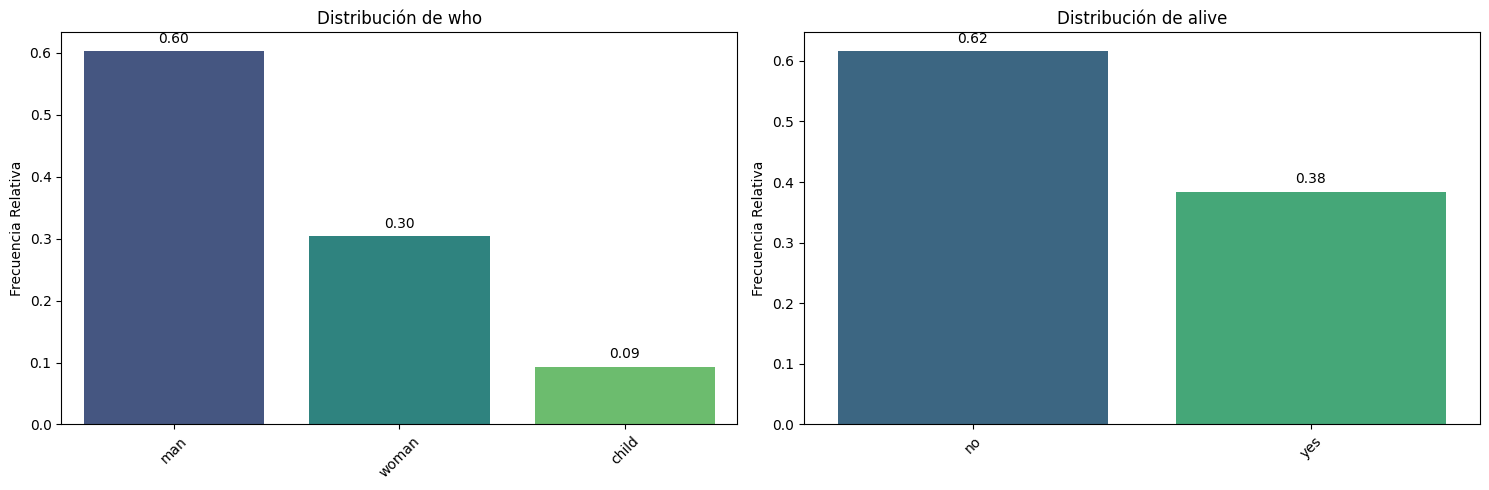

In [13]:
pinta_distribucion_categoricas(df_titanic,["who","alive"], relativa = True, mostrar_valores= True)

In [14]:
df_titanic

,sex,age,fare,class,who,adult_male,embark_town,alive,alone,family_members
0,male,22.0,7.2500,Third,man,True,Southampton,no,False,1
1,female,38.0,71.2833,First,woman,False,Cherbourg,yes,False,1
2,female,26.0,7.9250,Third,woman,False,Southampton,yes,True,0
3,female,35.0,53.1000,First,woman,False,Southampton,yes,False,1
4,male,35.0,8.0500,Third,man,True,Southampton,no,True,0
...,...,...,...,...,...,...,...,...,...,...
886,male,27.0,13.0000,Second,man,True,Southampton,no,True,0
887,female,19.0,30.0000,First,woman,False,Southampton,yes,True,0
888,female,32.0,23.4500,Third,woman,False,Southampton,no,False,3
889,male,26.0,30.0000,First,man,True,Cherbourg,yes,True,0


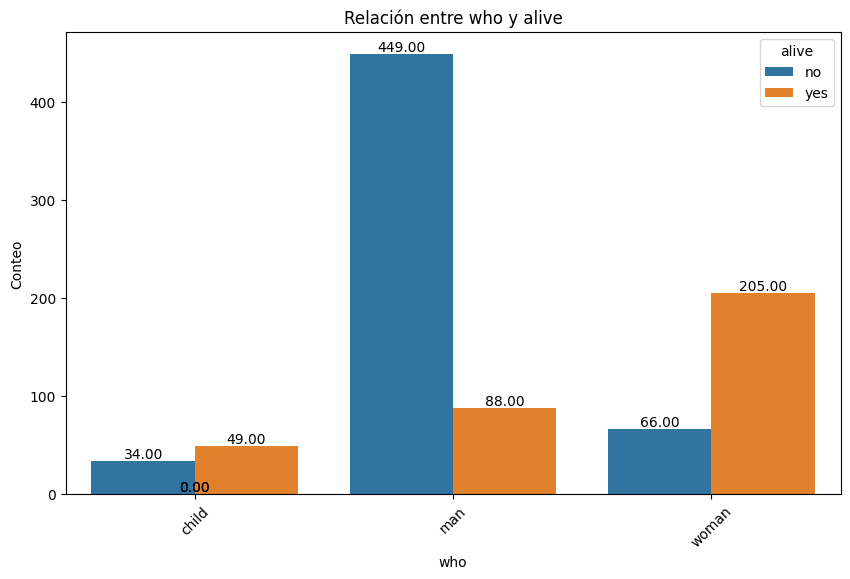

In [15]:
plot_categorical_relationship_fin(df_titanic, "who","alive", show_values= True)

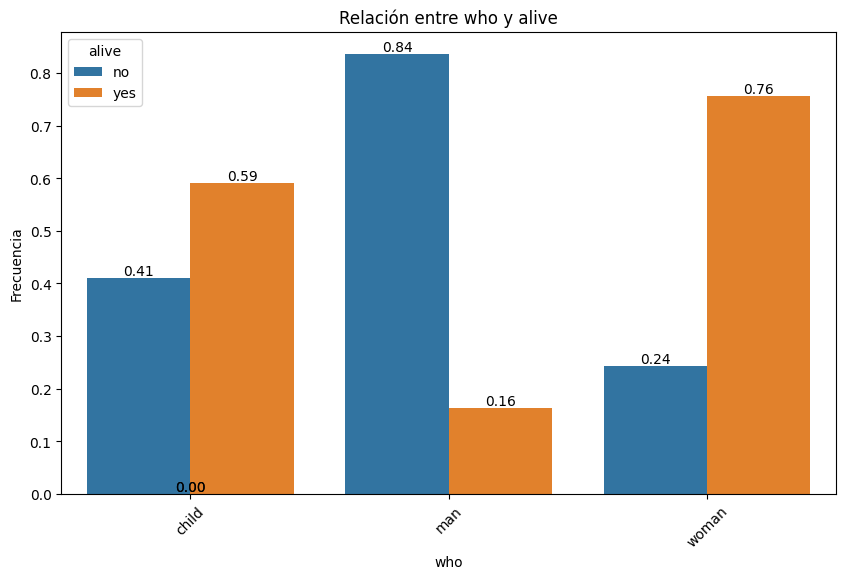

In [16]:
plot_categorical_relationship_fin(df_titanic, "who","alive", relative_freq = True, show_values = True)

In [17]:
tabla_contingencia = pd.crosstab(df_titanic['alive'], df_titanic['who'])
tabla_contingencia

who,child,man,woman
alive,,,
no,34,449,66
yes,49,88,205


In [18]:
from scipy.stats import chi2_contingency

chi2, p, dof, expected = chi2_contingency(tabla_contingencia)


print("Valor Chi-Cuadrado:", chi2)
print("P-Value:", p)
print("Grados de Libertad:", dof)
print("Tabla de Frecuencias Esperadas:\n", expected)

Valor Chi-Cuadrado: 283.923050324233
P-Value: 2.2227620817798914e-62
Grados de Libertad: 2
Tabla de Frecuencias Esperadas:
 [[ 51.14141414 330.87878788 166.97979798]
 [ 31.85858586 206.12121212 104.02020202]]


In [19]:
df_who_filtro= df_titanic[df_titanic['who'].isin(['adult', 'child'])]
tabla_contingencia_who = pd.crosstab(df_who_filtro['alive'], df_who_filtro['who'])
tabla_contingencia_who


who,child
alive,
no,34
yes,49


In [20]:
from scipy.stats import chi2_contingency

chi2, p, dof, expected = chi2_contingency(tabla_contingencia_who)


print("Valor Chi-Cuadrado:", chi2)
print("P-Value:", p)
print("Grados de Libertad:", dof)
print("Tabla de Frecuencias Esperadas:\n", expected)

Valor Chi-Cuadrado: 0.0
P-Value: 1.0
Grados de Libertad: 0
Tabla de Frecuencias Esperadas:
 [[34.]
 [49.]]


¿Sobrevivieron más hombres, mujeres o niños? ¿Y en términos relativos? 
 Sobrevivieron mas mujeres en ambos casos (mas porcentaje y mas numero absoluto).

¿Existe alguna relación estadísticamente significativa entre el sexo y la supervivencia en el Titanic?
 Segun el p-value del test de Chi cuadrado, es menor de 0.05 --> Es estadisticamente significativo (no es casual).

¿Y entre ser adulto o ser niño?
 Segun el p-value del test de Chi cuadrado, es mayor de 0.05 --> No es estadisticamente significativo (es casual).

2. En términos absolutos, ¿de que clase sobrevivieron más pasajeros?¿ Y en términos relativos? ¿Existe alguna relación estadísticamente significativa entre la clase en la que se viajaba y la supervivencia?

In [21]:
#Aqui tenemos dos variables categóricas (class y alive). Haremos un analisis bivariante de categoricas.
#Voy a pintar distribucion (frecuencias), y luego voy a tomar como directora la supervivencia.

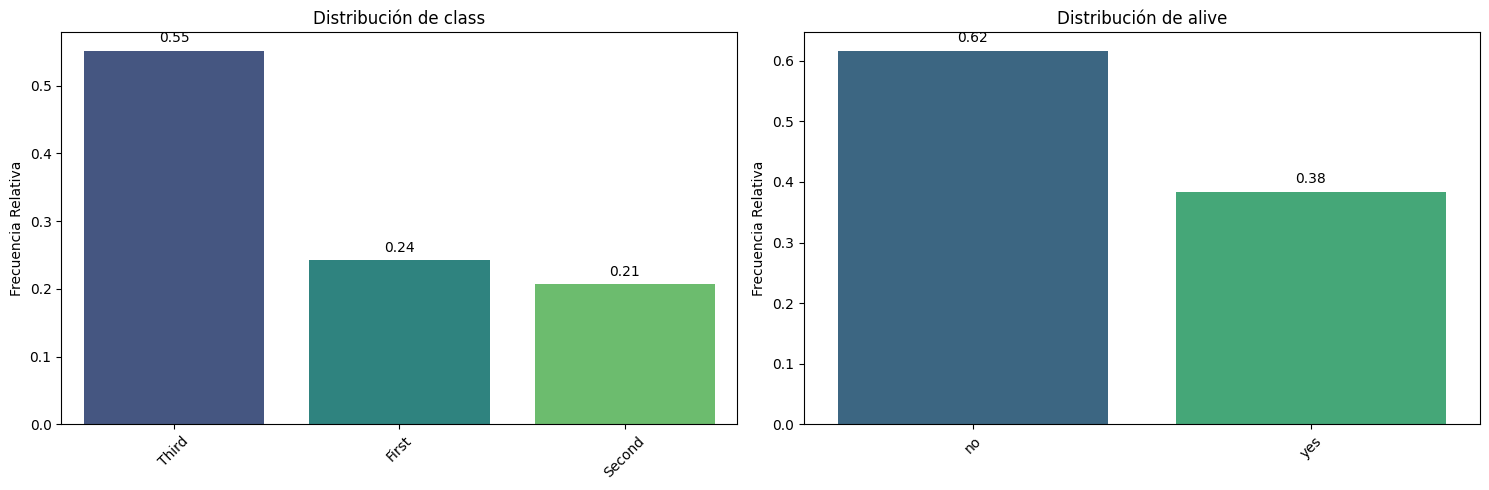

In [22]:
pinta_distribucion_categoricas(df_titanic,["class","alive"], relativa = True, mostrar_valores= True)

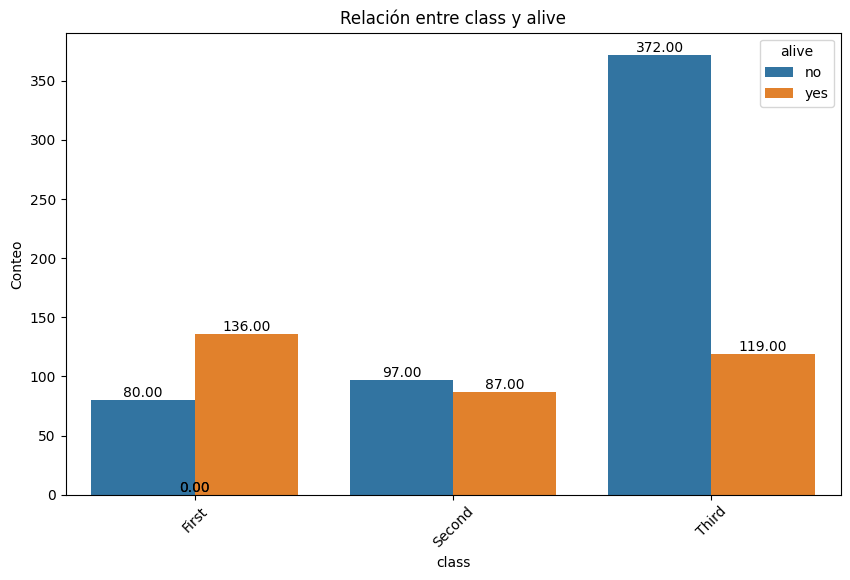

In [23]:
plot_categorical_relationship_fin(df_titanic, "class","alive", show_values= True)

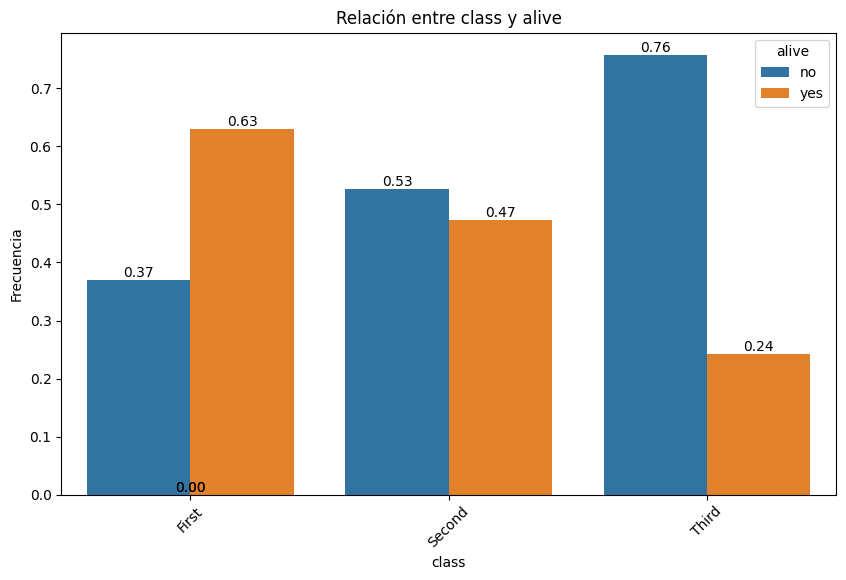

In [24]:
plot_categorical_relationship_fin(df_titanic, "class","alive", relative_freq = True, show_values = True)

In [25]:
tabla_contingencia_class = pd.crosstab(df_titanic['class'], df_titanic['who'])
tabla_contingencia_class

who,child,man,woman
class,,,
First,6,119,91
Second,19,99,66
Third,58,319,114


In [26]:
from scipy.stats import chi2_contingency

chi2, p, dof, expected = chi2_contingency(tabla_contingencia_class)


print("Valor Chi-Cuadrado:", chi2)
print("P-Value:", p)
print("Grados de Libertad:", dof)
print("Tabla de Frecuencias Esperadas:\n", expected)

Valor Chi-Cuadrado: 37.34293526831214
P-Value: 1.5308103860076598e-07
Grados de Libertad: 4
Tabla de Frecuencias Esperadas:
 [[ 20.12121212 130.18181818  65.6969697 ]
 [ 17.14029181 110.8956229   55.9640853 ]
 [ 45.73849607 295.92255892 149.33894501]]


¿De que clase sobrevivieron más pasajeros? ¿ Y en términos relativos? 

   En primera clase, tanto en terminos absolutos como relativos.

¿Existe alguna relación estadísticamente significativa entre la clase en la que se viajaba y la supervivencia?

   Segun el p-value del test de Chi cuadrado, es menor de 0.05 --> Es estadisticamente significativo (no es casual).


3. ¿De qué ciudad sobrevivieron más personas?¿Y porcentualmente de que ciudad sobrevivieron más personas? ¿Hay alguna relación estadística significativa entre haber embarcado en una de las tres ciudades y haber sobrevivido o fallecido?

In [27]:
#Aqui tenemos dos variables categóricas (embark_town y alive). Haremos un analisis bivariante de categoricas.
#Voy a pintar distribucion (frecuencias), y luego voy a tomar como directora la supervivencia.

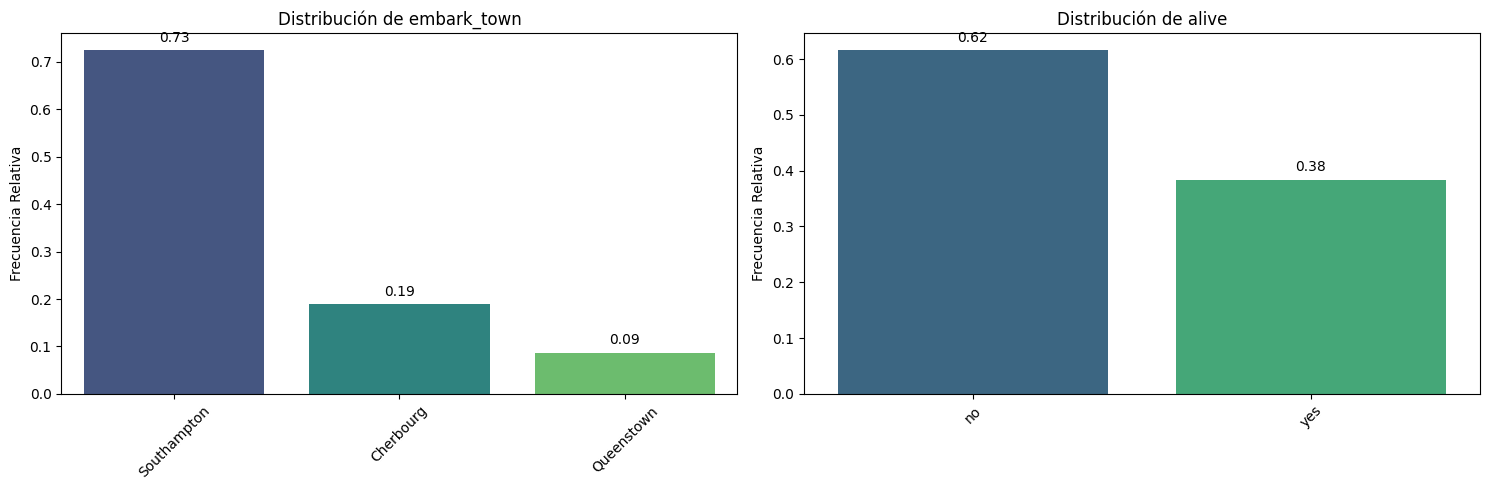

In [28]:
pinta_distribucion_categoricas(df_titanic,["embark_town","alive"], relativa = True, mostrar_valores= True)

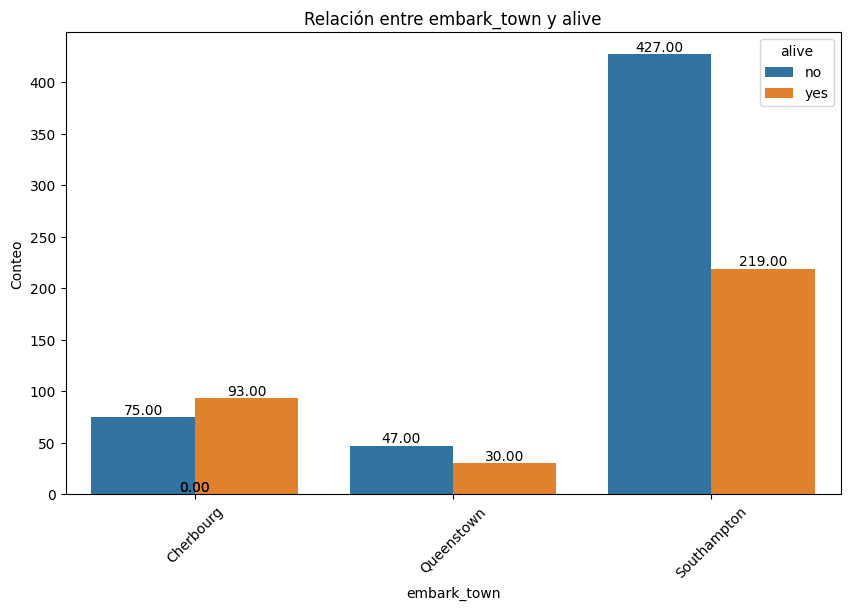

In [29]:
plot_categorical_relationship_fin(df_titanic, "embark_town","alive", show_values= True)

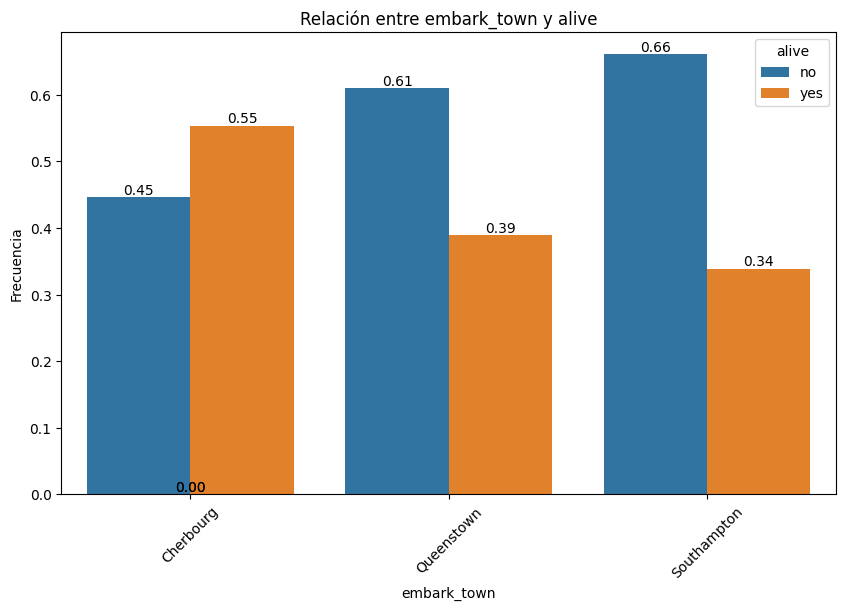

In [30]:
plot_categorical_relationship_fin(df_titanic, "embark_town","alive", relative_freq = True, show_values = True)

In [31]:
tabla_contingencia_town = pd.crosstab(df_titanic['class'], df_titanic['who'])
tabla_contingencia_town

who,child,man,woman
class,,,
First,6,119,91
Second,19,99,66
Third,58,319,114


In [32]:
from scipy.stats import chi2_contingency

chi2, p, dof, expected = chi2_contingency(tabla_contingencia_town)

print("Valor Chi-Cuadrado:", chi2)
print("P-Value:", p)
print("Grados de Libertad:", dof)


Valor Chi-Cuadrado: 37.34293526831214
P-Value: 1.5308103860076598e-07
Grados de Libertad: 4


¿De qué ciudad sobrevivieron más personas?¿Y porcentualmente de que ciudad sobrevivieron más personas? 

En términos absolutos sobrevivieron mas de Southampton, en términos relativos sobrevivieron mas de Cherbourg.

¿Hay alguna relación estadística significativa entre haber embarcado en una de las tres ciudades y haber sobrevivido o fallecido?

Segun el p-value del test de Chi cuadrado, es menor de 0.05 --> Es estadisticamente significativo (no es casual).


4. ¿Qué relación hay entre el precio del pasaje y la supervivencia/fallecimiento?

In [33]:
#Aqui tenemos una variable numerica (fare) y una categorica (alive). Haremos un analisis bivariante combinado.
#Voy a pintar distribucion (frecuencias), y luego voy a tomar como directora la supervivencia.

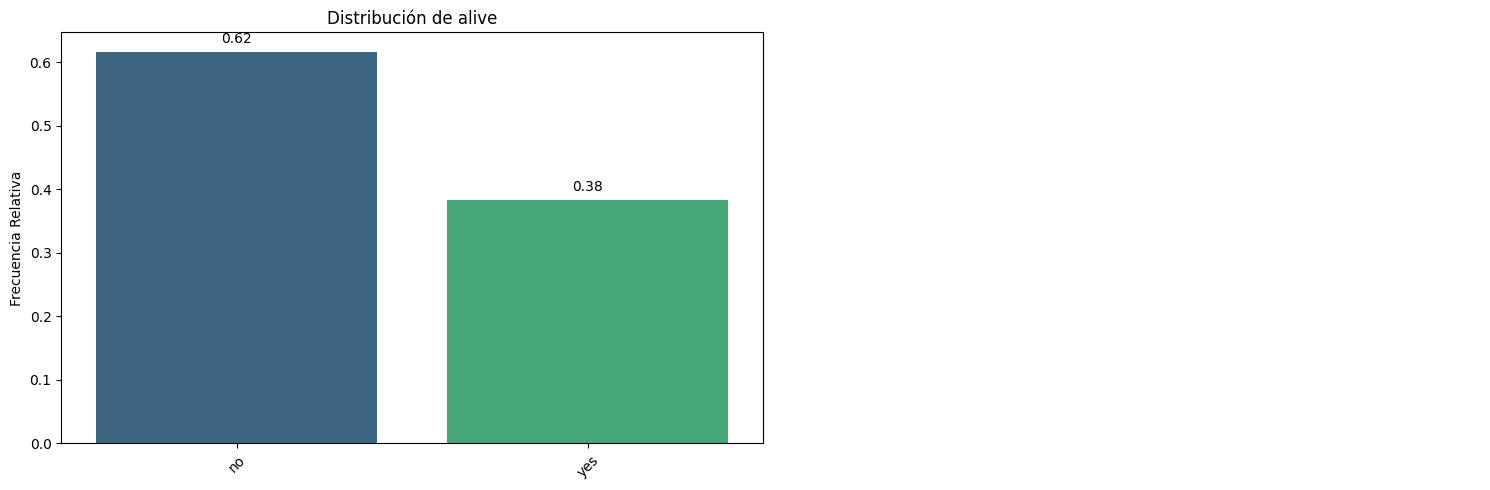

In [34]:
pinta_distribucion_categoricas(df_titanic,["alive"], relativa= True, mostrar_valores= True)

(2,)


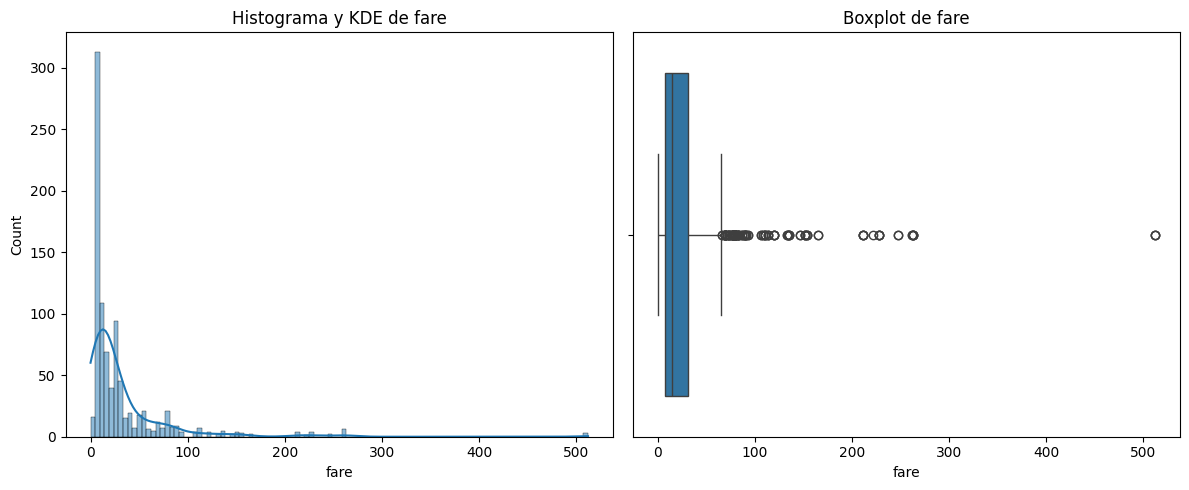

In [35]:
plot_combined_graphs(df_titanic,["fare"])

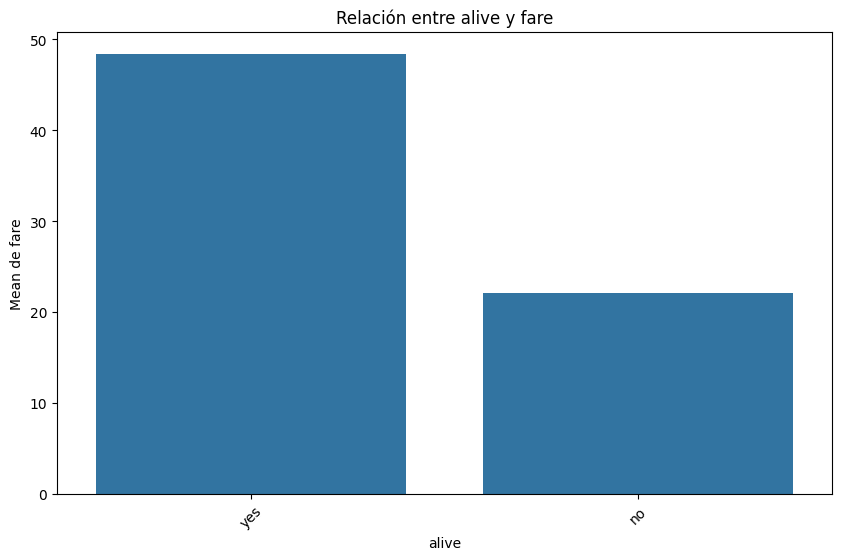

In [36]:
#Mostramos diferentes medidas de la variable numérica en función de los valores de la categórica (voy a hacerlo de la media).

plot_categorical_numerical_relationship(df_titanic,"alive","fare", measure = "mean")

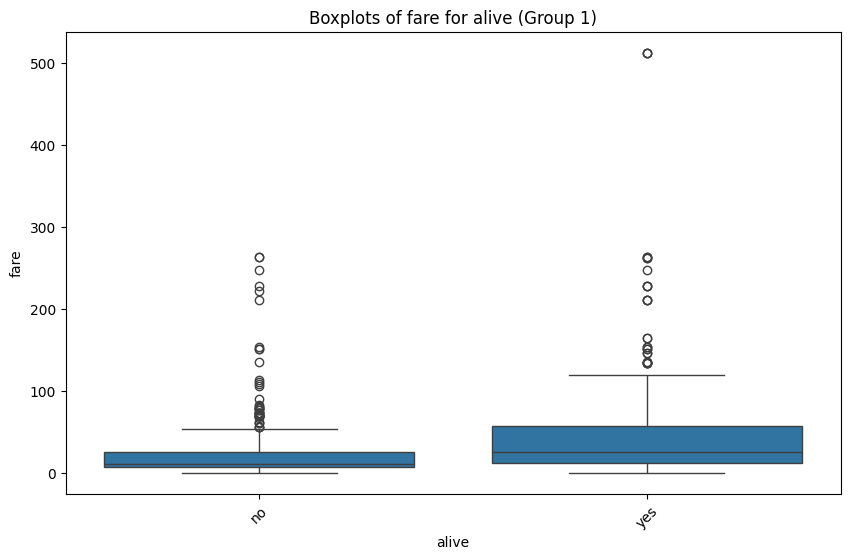

In [37]:
#Mostramos diferentes medidas de la variable numérica en función de los valores de la categórica. Comparemos los diagramas de caja:

plot_grouped_boxplots(df_titanic,"alive","fare")

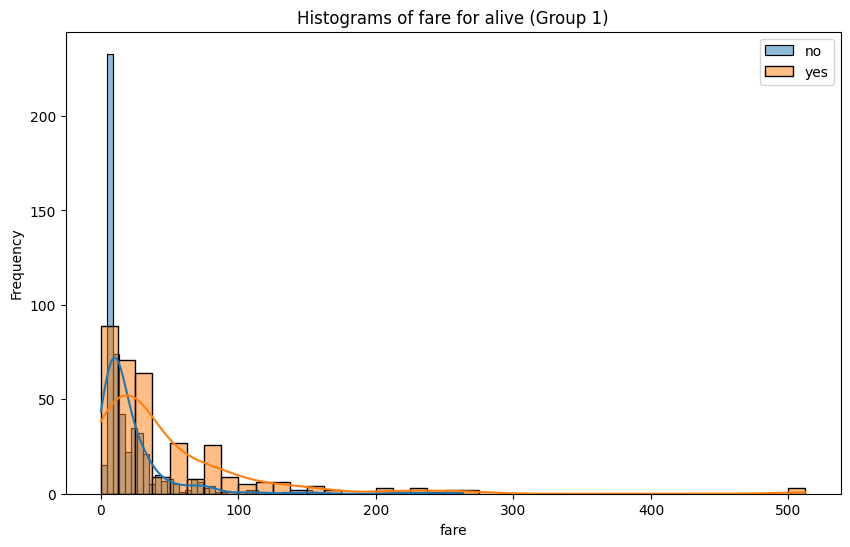

In [38]:
plot_grouped_histograms(df_titanic,"alive", "fare", group_size =2)

La relacion es que en los pasajeros que mas pagaron por el precio del billete hay una tendencia a mayor supervivencia (hace falta hacer un estadistico -> t-Student).

5. Existen pasajero que no pagaron el billete, ¿podrías explicar por qué? 

 Eran hombres adultos (he analizado mas abajo por who y fare) probablemente eran polizones como Leonardo Di Caprio.

¿Qué ocurrió con la persona que más dinero se dejó?

Segun los histogramas, el que mas dinero pago sobrevivió (lo cual es logico en esos ambientes).

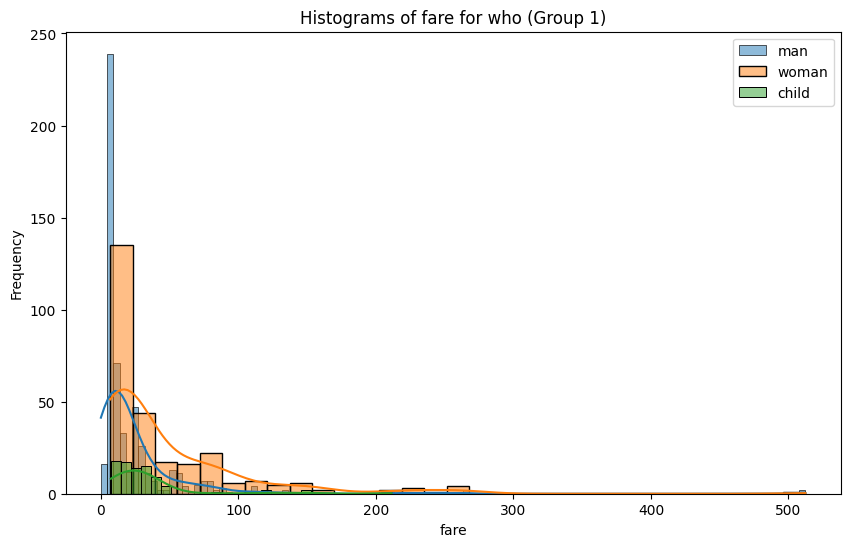

In [39]:
plot_grouped_histograms(df_titanic,"who", "fare", group_size =3)

6. Existe alguna relación entre el dinero pagado, la ciudad de embarque y la superviviencia/fallecimiento. No necesitas aplicar ningún test, muestralo numérica o visualmente.

In [40]:
#Aqui tenemos una variable numerica (fare) y dos categoricas (embark_town y alive). Voy a hacer un analisis multivariante.

In [41]:
col_directora = "alive"
col_1 = "embark_town"
col_2 = "fare"
diccionario_multivariante = {}
for valor in df_titanic[col_directora].unique():
    diccionario_multivariante[valor] = df_titanic.loc[df_titanic[col_directora] == valor,[col_2,col_1]] # Ojo al orden quiero ver para cada oferta como es la distribución de educacion

Respuesta no:


ValueError: could not convert string to float: 'Southampton'

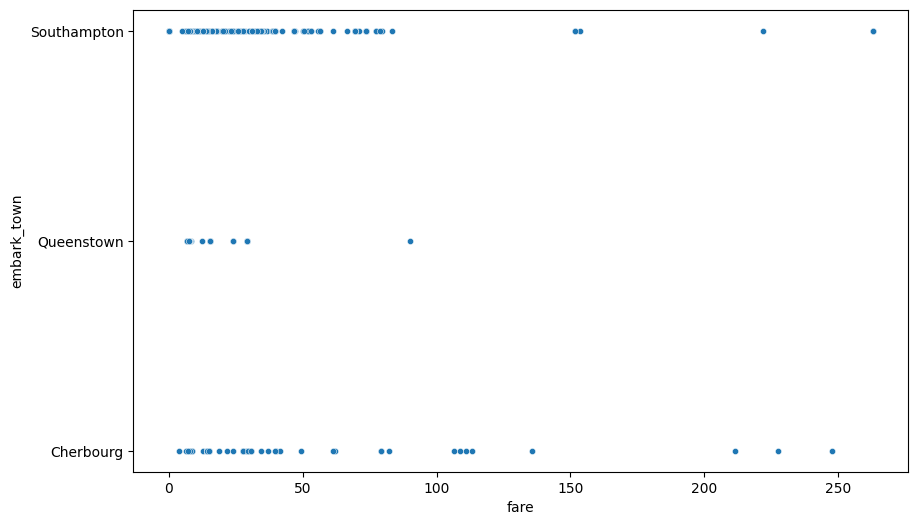

In [42]:
for valor,df_datos in diccionario_multivariante.items():
    print(f"Respuesta {valor}:")
    grafico_dispersion_con_correlacion(df_datos,col_2,col_1, tamano_puntos=20, mostrar_correlacion= True)

No puedo ver bien la respuesta en el caso del Si (me da error el codigo).

7. Ahondando en la relación entre sobrevivir o fallecer, la clase en la que se viajó y la edad de los pasajeros. ¿Qué agrupación de las dos variables (clase y edad) sobrevivió más en términos absolutos y en términos relativos?

In [ ]:
#Aqui tenemos una variable numerica (age) y dos categoricas (class y alive).


In [43]:
columnas = ["age","class","alive"] 
col_directora = "alive"
col_1 = [col for col in columnas if col != col_directora][0]
col_2 = [col for col in columnas if col != col_directora][1]
diccionario_multivariante = {}
for valor in df_titanic[col_directora].unique():
    diccionario_multivariante[valor] = df_titanic.loc[df_titanic[col_directora] == valor,[col_2,col_1]] # Ojo al orden quiero ver para cada oferta como es la distribución de educacion

Respuesta no:


ValueError: could not convert string to float: 'Third'

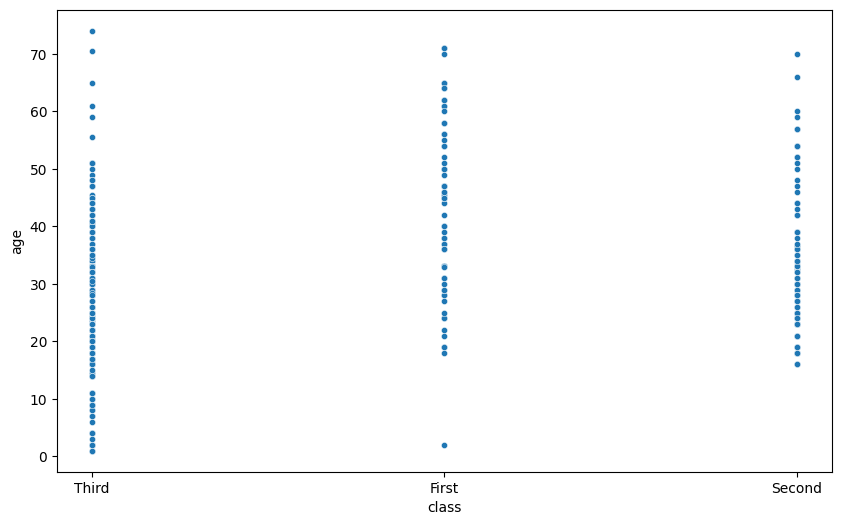

In [44]:
for valor,df_datos in diccionario_multivariante.items():
    print(f"Respuesta {valor}:")
    grafico_dispersion_con_correlacion(df_datos,col_2,col_1, tamano_puntos=20, mostrar_correlacion= True)

De nuevo me da error el grafico.. Pero en lo que logro ver (respuesta no supervivencia), parece que la mayoria de los que no sobrevivieron eran jovenes que viajaban en 3ra clase.



8. Finalmente, muestra las posibles relaciones entre edad, coste del billete y supervivencia/fallecimiento. ¿Qué puedes decir al respecto?

In [45]:
#Aqui tenemos 2 variables numericas (age y fare) y una categoricas (alive).

In [46]:
columnas = ["age","fare","alive"] 
col_directora = "alive"
col_1 = [col for col in columnas if col != col_directora][0]
col_2 = [col for col in columnas if col != col_directora][1]
diccionario_multivariante = {}
for valor in df_titanic[col_directora].unique():
    diccionario_multivariante[valor] = df_titanic.loc[df_titanic[col_directora] == valor,[col_2,col_1]] # Ojo al orden quiero ver para cada oferta como es la distribución de educacion

Respuesta no:


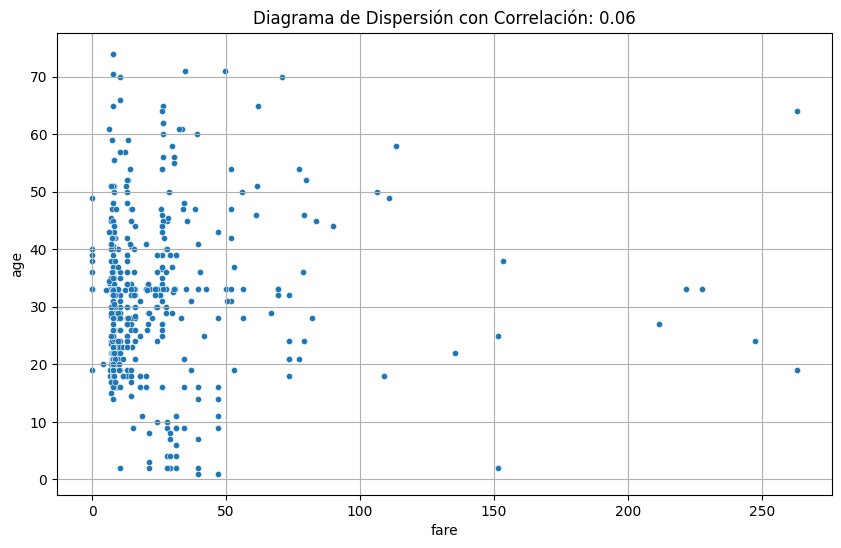

Respuesta yes:


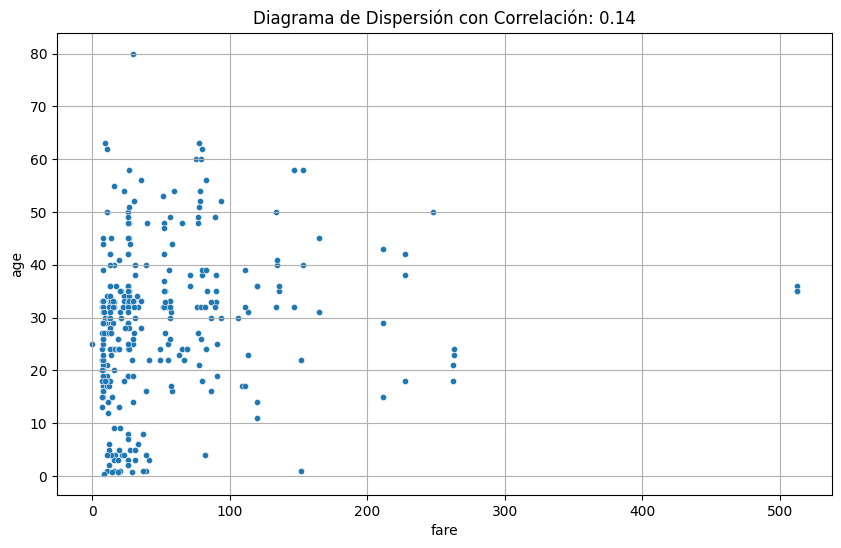

In [47]:
for valor,df_datos in diccionario_multivariante.items():
    print(f"Respuesta {valor}:")
    grafico_dispersion_con_correlacion(df_datos,col_2,col_1, tamano_puntos=20, mostrar_correlacion= True)

Del rango de los que mas pagaron y no sobrevivieron, la mayoria estaba entre los 20 y 40 años.
Los que mas pagaron tenian unos 35 años y sobrevivieron.


## #2 Viajes

El objetivo en este caso no es tanto hacer un montón de análisis sino de completar lo que quedó pendiente en el workout y de entender cómo de un dataset podemos obtener preguntas o hipótesis interesantes (si las hay)

### #2.1 

Carga el dataset de viajes del mes de junio. Repite el análisis bivariante entre las variables "Aircompany" e "Ingresos", mostrando previamente los viajes por compañía aérea. ¿Qué situación llamativa nos surgió? (Ten en cuenta que somos el departamenteo de DataScience de TabarAir)

In [48]:
df_air_jun = pd.read_csv("./data/dataset_viajes_jun23.csv")
df_air_jun

,aircompany,origen,destino,distancia,avion,con_escala,consumo_kg,duracion,ingresos,id_vuelo,mes
0,Airnar,París,Ginebra,411,Boeing 737,False,1028.691900,51,14232.65,Air_PaGi_10737,Jun23
1,FlyQ,Bali,Roma,12738,Boeing 737,True,33479.132544,1167,468527.19,Fly_BaRo_10737,Jun23
2,TabarAir,Ginebra,Los Angeles,9103,Airbus A380,False,109439.907200,626,584789.19,Tab_GiLo_11380,Jun23
3,MoldaviAir,París,Cincinnati,6370,Boeing 737,False,17027.010000,503,233342.51,Mol_PaCi_10737,Jun23
4,TabarAir,Cincinnati,Roma,7480,Boeing 747,False,86115.744000,518,438535.07,Tab_CiRo_10747,Jun23
...,...,...,...,...,...,...,...,...,...,...,...
595,PamPangea,Bali,Londres,12553,Boeing 737,True,33310.138680,1153,442668.52,Pam_BaLo_10737,Jun23
596,Airnar,Cádiz,París,1447,Airbus A380,False,17229.139600,116,87307.63,Air_CaPa_11380,Jun23
597,Airnar,Los Angeles,Cádiz,9373,Boeing 737,False,23231.917800,731,339943.47,Air_LoCa_10737,Jun23
598,FlyQ,Barcelona,Bali,13058,Boeing 747,True,144766.211200,1070,752212.98,Fly_BaBa_10747,Jun23


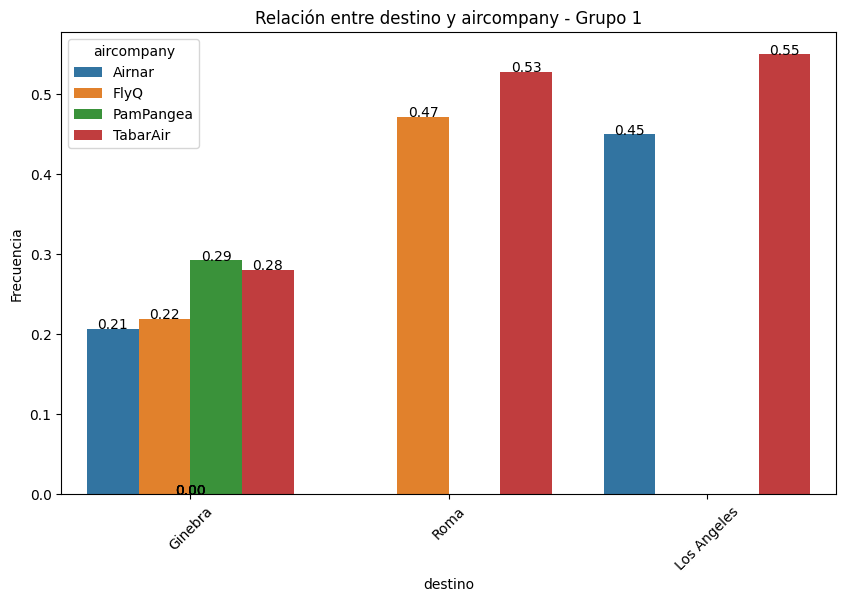

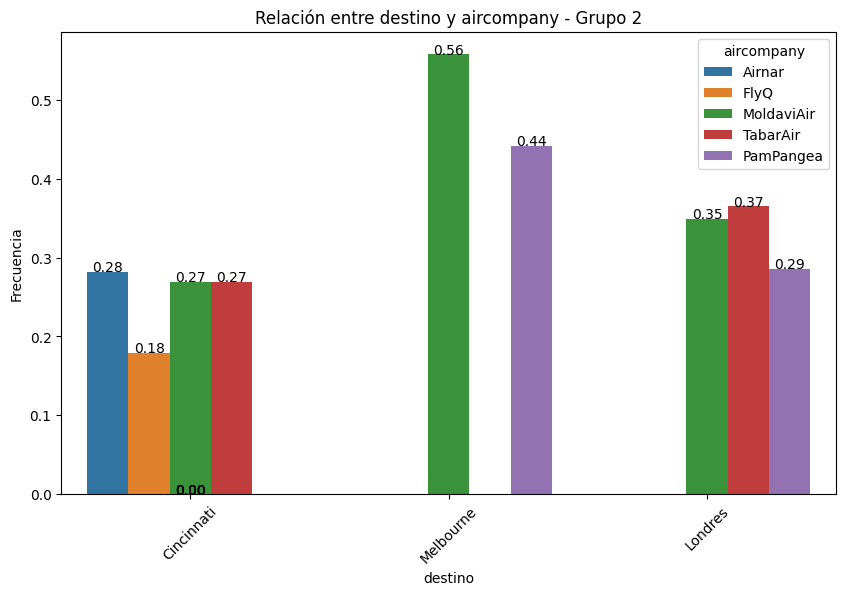

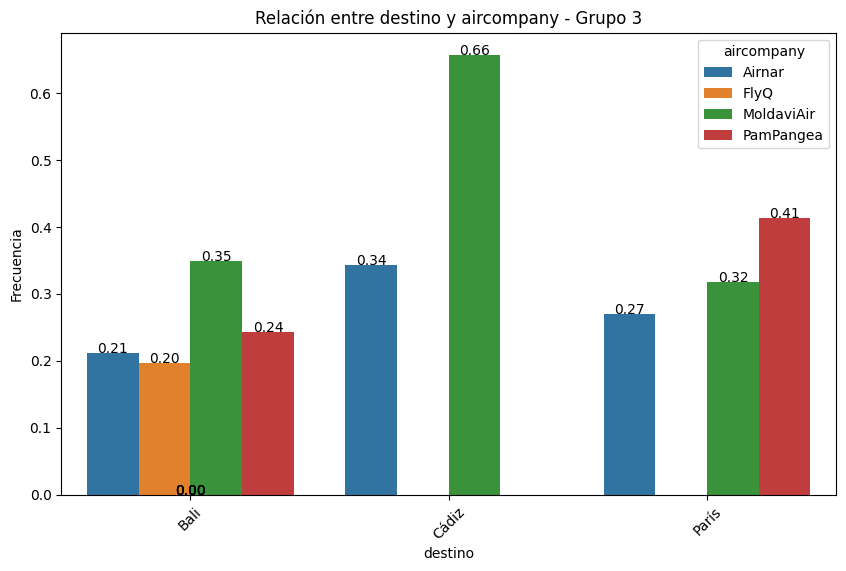

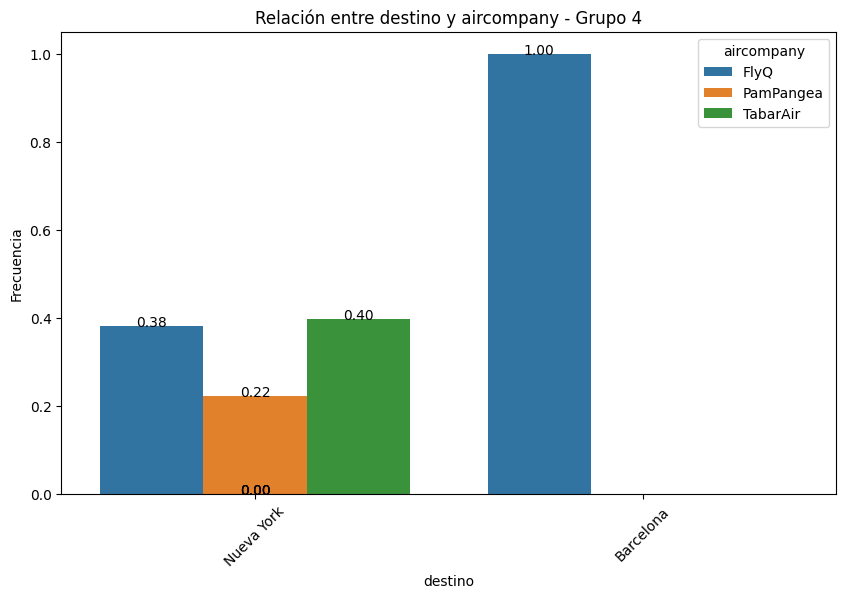

In [49]:
plot_categorical_relationship_fin(df_air_jun, "destino","aircompany", relative_freq = True, show_values = True, size_group = 3)

In [50]:
tabla_contingencia = pd.crosstab(df_air_jun['aircompany'], df_air_jun['destino'])
chi2, p, dof, expected = chi2_contingency(tabla_contingencia)

print("Valor Chi-Cuadrado:", chi2)
print("P-Value:", p)
print("Grados de Libertad:", dof)
print("Tabla de Frecuencias Esperadas:\n", expected)

Valor Chi-Cuadrado: 513.3047172905651
P-Value: 1.8324011299397667e-83
Grados de Libertad: 40
Tabla de Frecuencias Esperadas:
 [[11.          2.33333333 13.          5.83333333 13.66666667 10.5
   6.66666667  7.16666667 10.5        10.5         8.83333333]
 [11.88        2.52       14.04        6.3        14.76       11.34
   7.2         7.74       11.34       11.34        9.54      ]
 [14.63        3.10333333 17.29        7.75833333 18.17666667 13.965
   8.86666667  9.53166667 13.965      13.965      11.74833333]
 [12.87        2.73       15.21        6.825      15.99       12.285
   7.8         8.385      12.285      12.285      10.335     ]
 [15.62        3.31333333 18.46        8.28333333 19.40666667 14.91
   9.46666667 10.17666667 14.91       14.91       12.54333333]]


Según el test hay una relación estadística significativa, relación que podíamos observar visualmente (el hecho de que no todas las compañías viajen a todos los lugares ya es una relación, por ejemplo)

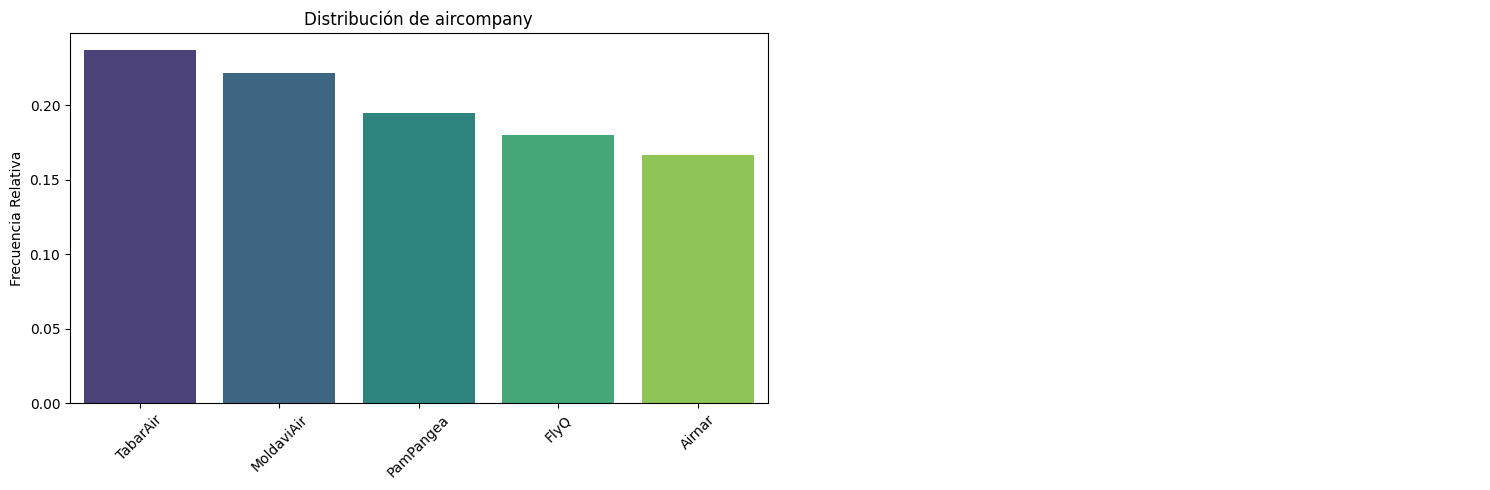

In [51]:
pinta_distribucion_categoricas(df_air_jun,["aircompany"], relativa= True)

(2,)


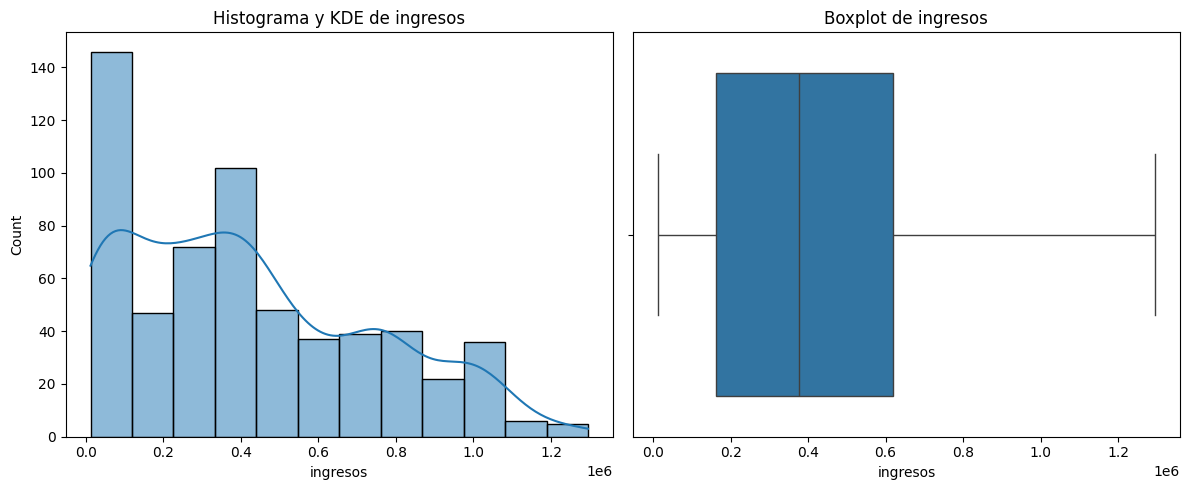

In [52]:
plot_combined_graphs(df_air_jun, ["ingresos"])

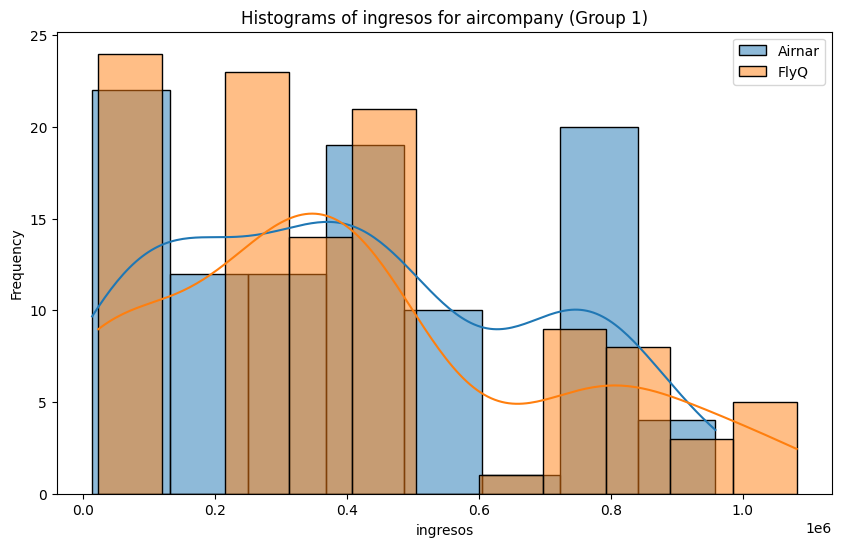

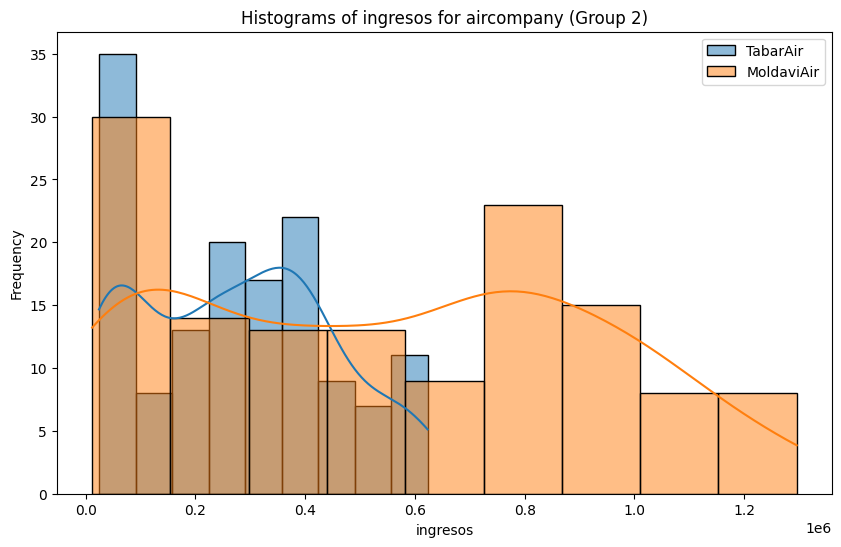

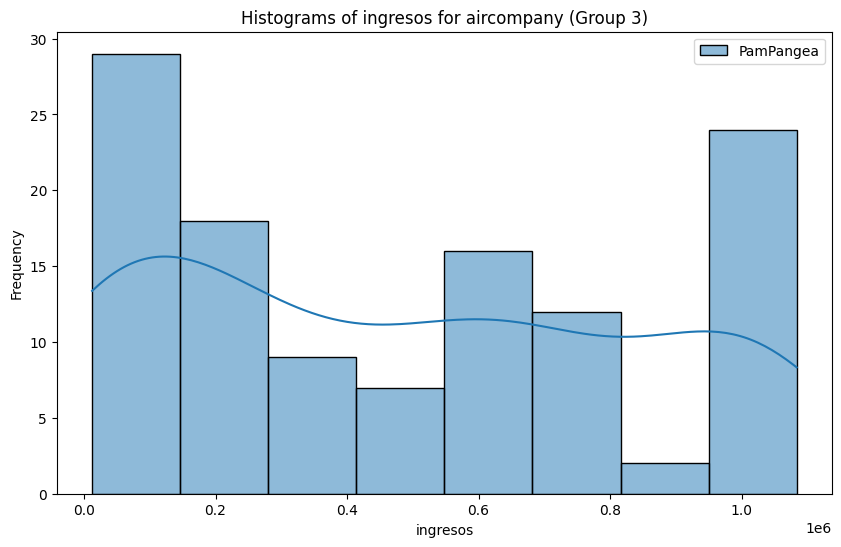

In [53]:
plot_grouped_histograms(df_air_jun, "aircompany","ingresos",group_size= 2)

En este caso la variable categórica no es binaria y no podemos usar la prueba U. Para estos casos empleamos el método ANOVA.

In [55]:

from scipy import stats


In [54]:
grupos = df_air_jun['aircompany'].unique()  # Obtener los valores únicos de la columna categórica, en este caso la compañía área
ingresos_por_company = [df_air_jun[df_air_jun['aircompany'] == grupo]['ingresos'] for grupo in grupos] # obtenemos los ingresos por compañía y los incluimos en una lista
ingresos_por_company

[0       14232.65
 9      110108.07
 17     518685.45
 21     799063.90
 23     432558.22
          ...    
 573    732878.07
 577    754191.00
 580    928050.52
 596     87307.63
 597    339943.47
 Name: ingresos, Length: 100, dtype: float64,
 1       468527.19
 33      273824.24
 36      235350.43
 40       25642.94
 41      417965.59
           ...    
 575     429377.42
 581    1004810.48
 589     398905.47
 590      31227.48
 598     752212.98
 Name: ingresos, Length: 108, dtype: float64,
 2      584789.19
 4      438535.07
 10     111056.67
 12     184079.01
 13      46200.30
          ...    
 572    258737.92
 582    423371.06
 587    404542.35
 593    550268.31
 599    330320.81
 Name: ingresos, Length: 142, dtype: float64,
 3       233342.51
 5       728045.68
 6        13805.52
 11      764998.83
 16      719577.55
           ...    
 578      12372.41
 579     409713.51
 583    1006880.11
 584      70674.57
 585     225493.20
 Name: ingresos, Length: 133, dtype: float64,
 7

In [56]:

f_val, p_val = stats.f_oneway(*ingresos_por_company) # El método * (igual que cuando vimos *args hace mil años) 
                                                    # lo que hace es separar todos los elementos de la lista y pasarselos como argumento a la función
print("Valor F:", f_val)
print("Valor p:", p_val)

Valor F: 15.68687291880937
Valor p: 3.267745855663723e-12


En este caso la hipótesis nula vuelve a ser que las distribuciones de valores para cada compañía no tienen relación estadística, pero ahora como el p-value es menor que 0.05, rechazamos la hipótesis nula y reafirmamos la alternativa o contraria, es decir que sí que los ingresos no se parecen para cada compañía y que podemos extrapolar ese valor a otro conjuto de compañías con datos similares.

### #2.2

Repite el análisis multivariante entre "ingresos","distancias" y "consumo_kg". ¿Qué veíamos que parecía también muy prometedor?

(3, 2)


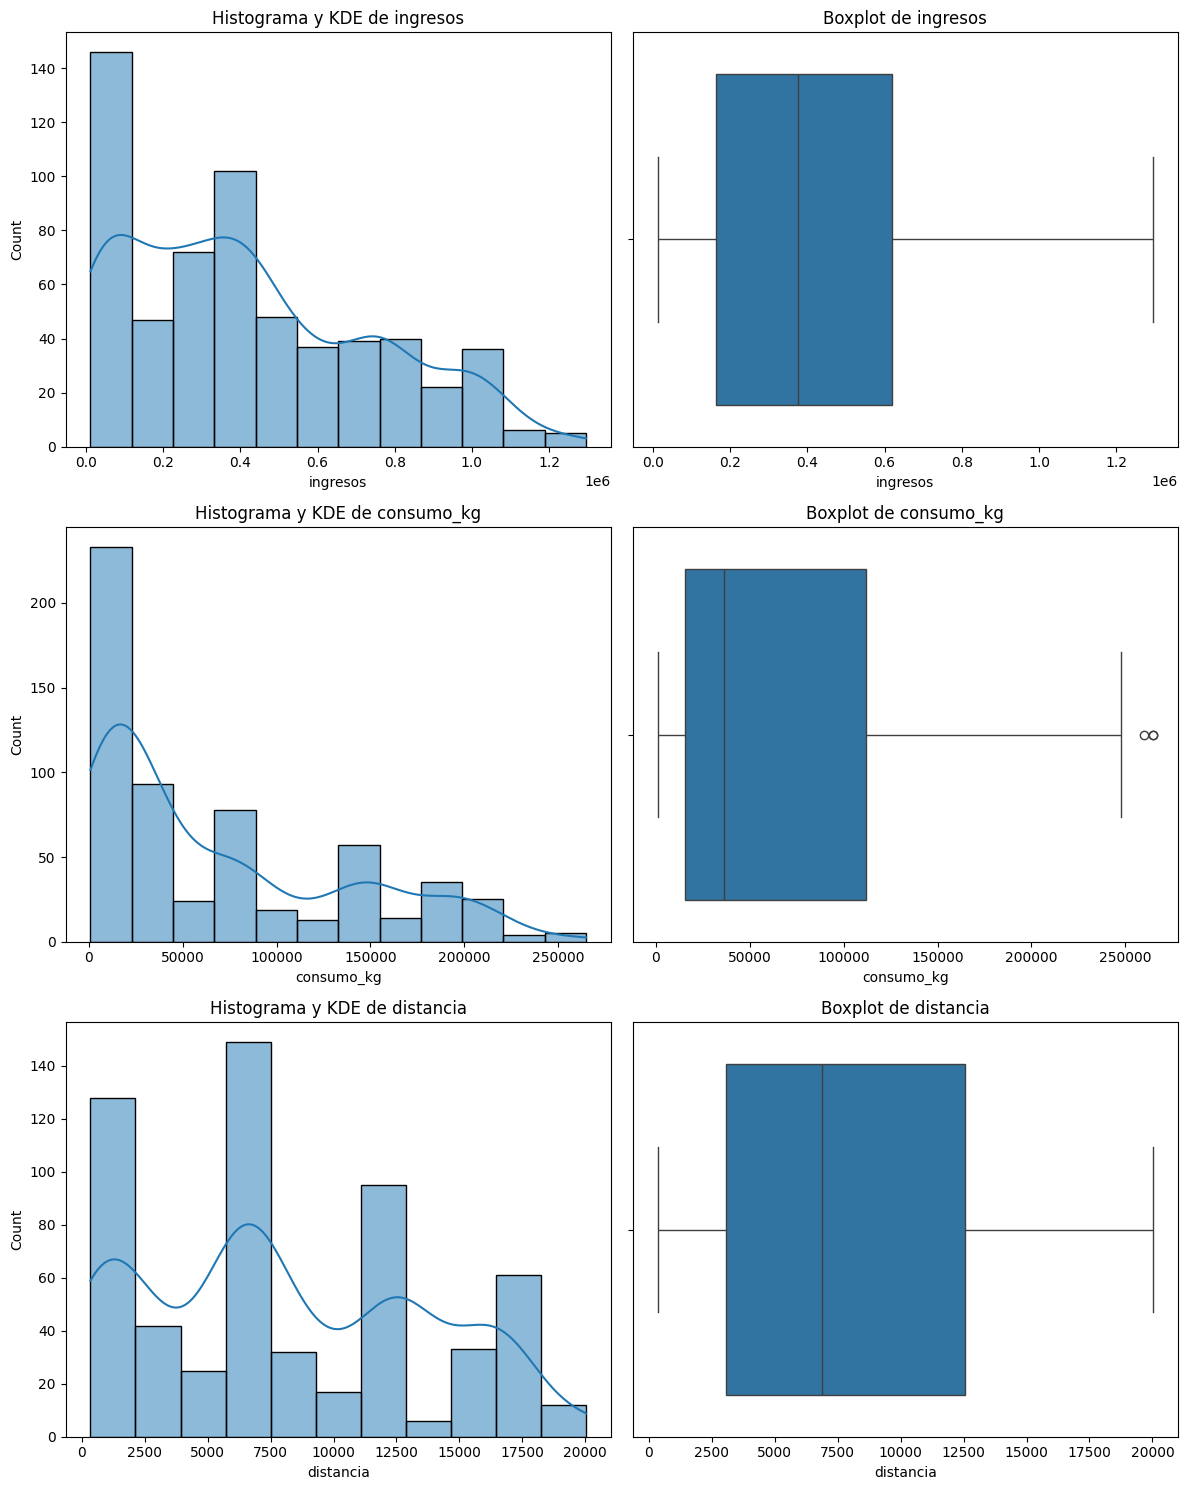

In [57]:
plot_combined_graphs(df_air_jun,["ingresos","consumo_kg","distancia"])

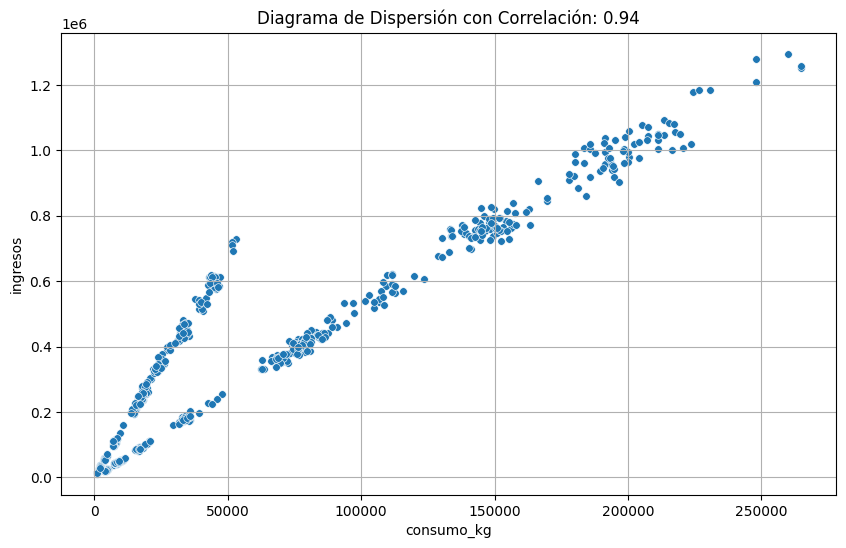

In [58]:
grafico_dispersion_con_correlacion(df_air_jun,"consumo_kg", "ingresos", mostrar_correlacion= True, tamano_puntos= 30)

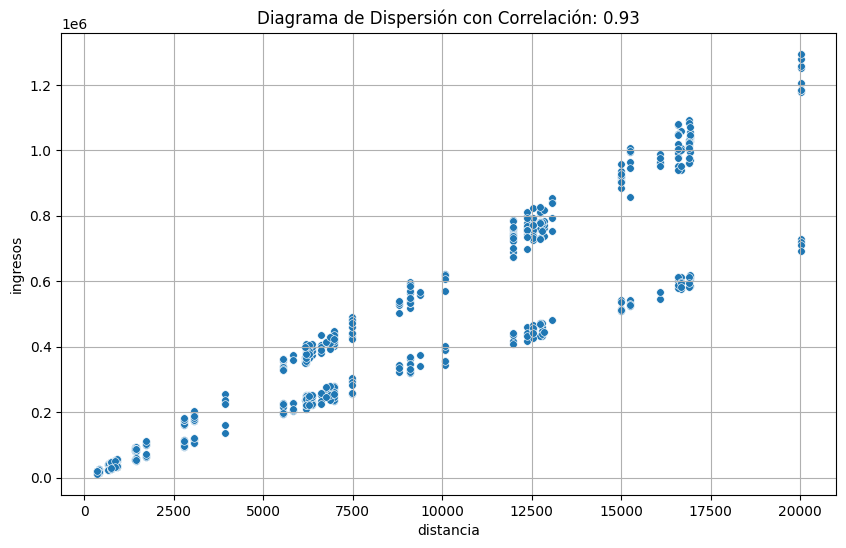

In [59]:
grafico_dispersion_con_correlacion(df_air_jun,"distancia","ingresos", mostrar_correlacion= True, tamano_puntos= 30)

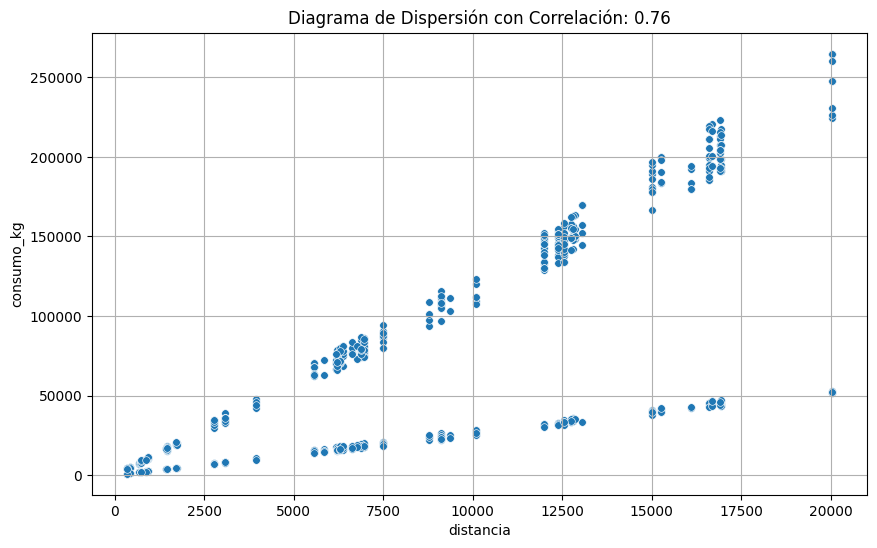

In [60]:
grafico_dispersion_con_correlacion(df_air_jun,"distancia","consumo_kg", mostrar_correlacion= True, tamano_puntos= 30)

Lo siguiente será mostrar los tres valores a la vez, con un diagrama de burbujas que es como un scatter plot (un diagrama de dispersión) pero en el que el tamaño de los puntos los marca la tercera variable:

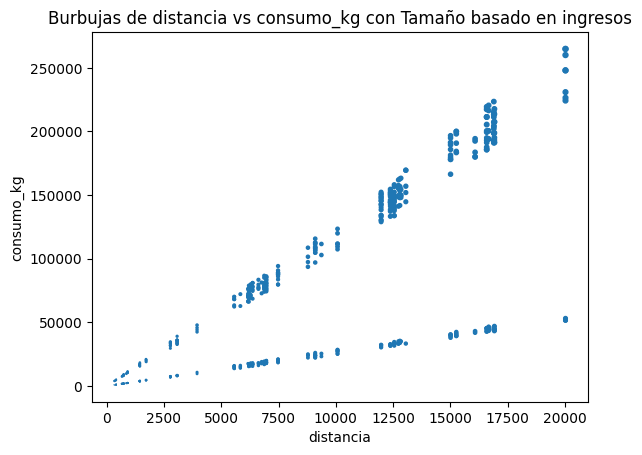

In [61]:
bubble_plot(df_air_jun,"distancia","consumo_kg","ingresos", scale = 100000)

Era muy interesante que habia dos tipos de viajes segun la distancia, de ahi que las lineas se separen en dos grupos, y hay algunos que consumen mas y otros menos, era interesante ver a que compañia opdrian pertenecer. Parece que los vuelos de mas ingresos (mayor tamaño de burbuja), son los que mas consumen.

In [62]:
df_solo_numeros = df_air_jun.select_dtypes(include = ["float","int"])
df_solo_numeros.columns

Index(['distancia', 'consumo_kg', 'duracion', 'ingresos'], dtype='object')

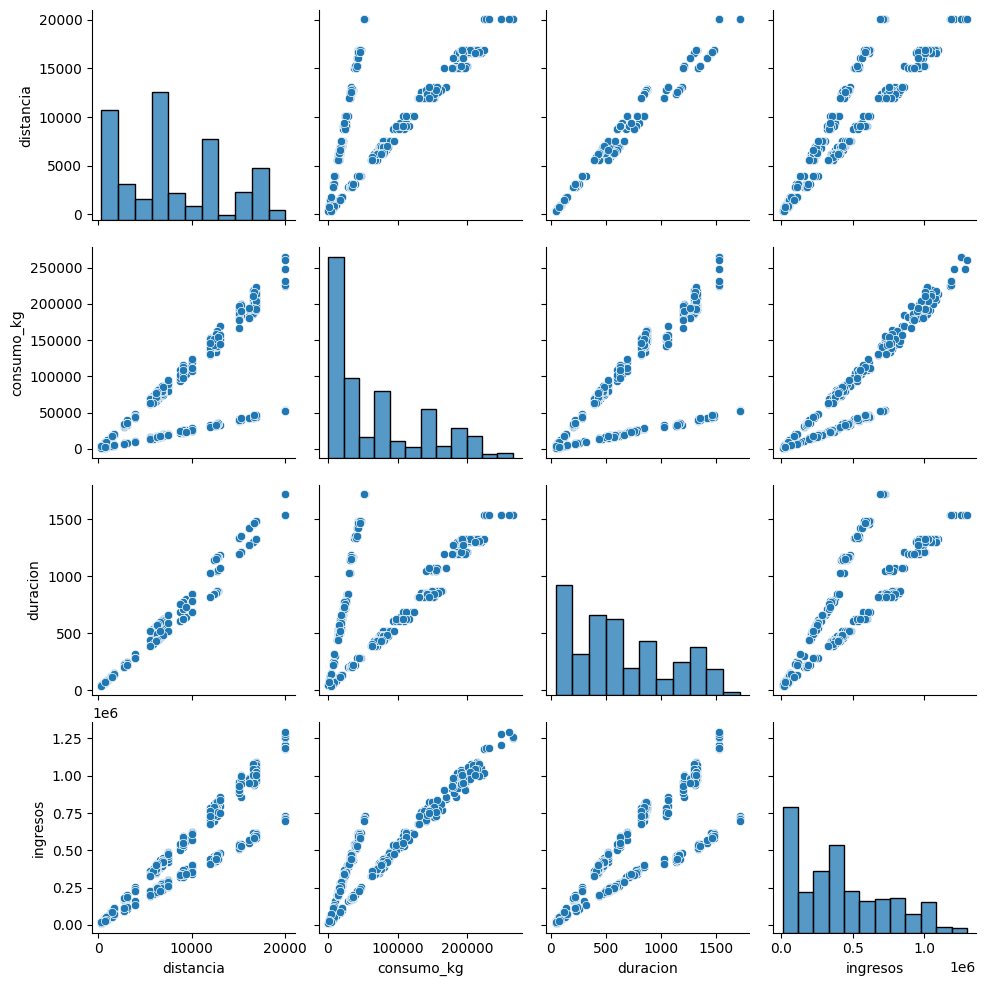

In [63]:
sns.pairplot(df_solo_numeros)
plt.show()

### #2.3

Crea una variable categorica "cat_vuelo" a partir de distancias, escoge los rangos de las categorías basándote en la distribución de valores de "distancia" (sugerencia entre 3 y 4 categorías). Extra: Reaiza ahora otra vez el análisis multivariante "cat_vuelo", "ingresos", "consumo_kg". ¿Ves algo diferente?

In [64]:
print(df_air_jun['distancia'].describe())

count      600.000000
mean      8071.003333
std       5550.244086
min        344.000000
25%       3073.000000
50%       6877.000000
75%      12553.000000
max      20029.000000
Name: distancia, dtype: float64


In [65]:
bins = [0, 1000, 10000, 20000, float('inf')]
labels = ['Corto', 'Medio', 'Largo', 'Muy Largo']
df_air_jun['cat_vuelo'] = pd.cut(df_air_jun['distancia'], bins=bins, labels=labels, right=False)

ValueError: could not convert string to float: 'Corto'

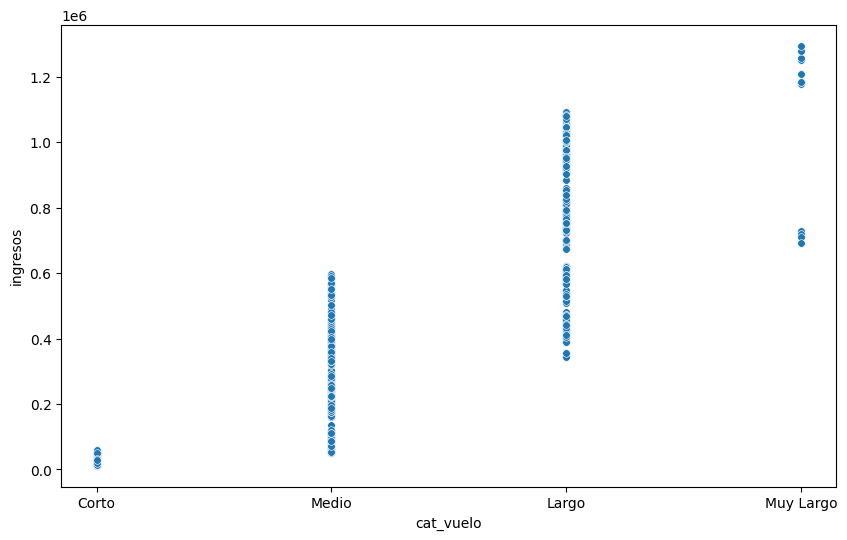

In [66]:
grafico_dispersion_con_correlacion(df_air_jun,"cat_vuelo", "ingresos", mostrar_correlacion= True, tamano_puntos= 30)

ValueError: could not convert string to float: 'Corto'

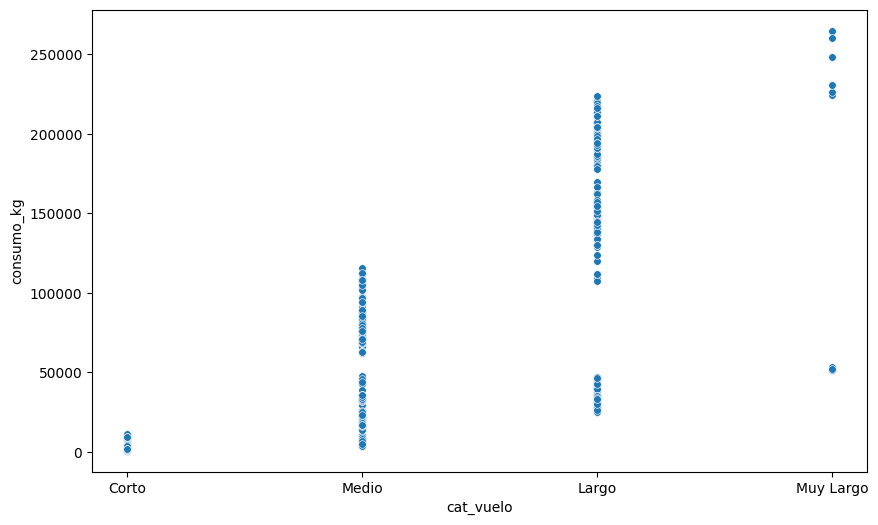

In [67]:
grafico_dispersion_con_correlacion(df_air_jun,"cat_vuelo","consumo_kg", mostrar_correlacion= True, tamano_puntos= 30)

Segun mi analisis, los vuelos muy largos (mas de 20000 km) consumen mas pero tambien tienen mas ingresos.

### Extra:

#1 Consejos para encontrar "objetivos":

Si partes de un dataset que te parece interesante pero sin pregruntras claras, haz como hicimos con el dataset de Aviones. Describe, prioriza a ojo tus variables, realiza un análisis univariante completo, realiza un análisis bivariante ente las parejas de variables que te parecieron más intereantes. Llegados a este punto si el dataset tiene riqueza informativa, algo diferente tiene que haber aparecido (otra cosa es que sea interesante para ti :-)).  

Fíjate en lo que encontramos en el dataset de viajes: la empresa de más vuelos es la que menos ingresos tiene o la existencia clara de una línea de vuelos más eficientes en consumo que otros y otra de mayor ingresos por consumo. Lo siguiente es explorar esos puntos normalmente intentando contestar a: ¿por qué pasa?¿dónde,cuándo o cómo pasa?  

Busca esas "notas discordantes" en tu dataset, ya de por sí son mensajes del análisis. Ordénalas por importancia (importancia = impactan en ingresos, impactan en la calidad de la vida de las personas, impactan en el coste y poco más hay) e intenta entender por qué suceden esas notas discordantes, cómo solucionarlas o aprovecharlas y ya tienes objeetivos para el EDA; incluso si no encuentras respuesta siempre tendras esas notas discordantes, la conclusión de que no se puede avanzar con los datos que se tienen y los próximos pasos de encontrar más información para explicar lo que ocurre.

#2 Contestando a las preguntas de "Viajes".

- Necesitamos identificar esas líneas eficientes, para ello crea una variable que mida el ingreso por kilogramo consumido y otra que mida el kilogramo consumido por kilómetro. Haz el análisis univariante de las mismas intentando encontrar una diferencia clara entre viajes eficientes y no eficientes (que sabemos que existe). Fija un umbral para indicar si un viaje es supereficiente o si no lo es
- Crea esa variable de eficiencia binaria de eficiencia.
- Ahora haz el análisis bivariante de esa eficiencia y las compañías aéreas (queremos ver si realmente eso explica la situación de TabarAir). 
- Para nota: Hacer los análisis multivariante por compañía, eficiencia, tipo de avión y compañía, eficiencia, destino e incluso el de compañía, eficiencia, origen, destino.
- Con todo ello deberías poder encontrar si hay respuesta a la situación de TabarAir además de poder mostrar otros datos interesantes.